#                            Predicting the field of Research Papers

In [1]:
import numpy as np
import pandas as pd
import ast
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm

In [2]:
train=pd.read_csv(r"C:\Users\HP\Downloads\Train_Data.csv")


In [3]:
train

,Title,Date,Abstract,Subjects
0,The Neutrino Ball Model of a Quasar,1993-04-07,It is suggested that the nonorthodox model o...,['Astrophysics']
1,Charged Boson Stars and Vacuum Instabilities,1993-05-12,We consider charged boson stars and study th...,"['Astrophysics', 'General Relativity and Quant..."
2,Pre-main sequence lithium burning. I. Weak T T...,1993-08-31,We derive lithium abundances in 53 T Tauri s...,['Astrophysics']
3,Very High Energy Gamma-Rays from AGN: Cascadin...,1993-12-18,Recent high energy gamma-ray observations (E...,['Astrophysics']
4,From the Owl to the Eskimo: the Radiation-Gasd...,1994-04-29,We present the results of two-dimensional ra...,['Astrophysics']
...,...,...,...,...
29186,On symmetries of Hamiltonians describing syste...,2019-04-30,We consider systems where dynamical variable...,"['Nuclear Theory', 'Astrophysics - High Energy..."
29187,Can dark energy be expressed as a power series...,2019-04-30,In this work we examine the possibility that...,"['General Relativity and Quantum Cosmology', '..."
29188,Slim accretion disks: theory and observational...,2019-04-30,Slim accretion disks idea emerged over 30 ye...,"['Astrophysics - Astrophysics of Galaxies', 'A..."
29189,"A 10,000-solar-mass black hole in the nucleus ...",2019-04-30,The motions of gas and stars in the nuclei o...,['Astrophysics - Astrophysics of Galaxies']


In [4]:
train.Subjects[0]

"['Astrophysics']"

## Converting string representation of a list to list.

https://stackoverflow.com/questions/1894269/convert-string-representation-of-list-to-list

In [5]:
for i in range(len(train)):
    x = train.Subjects[i]
    x = ast.literal_eval(x)
    x = [n.strip() for n in x]
    train.Subjects[i]=x

In [6]:
train.Subjects[0]

['Astrophysics']

## One Hot Encoding of Subjects

https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list

In [7]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
train = train.join(pd.DataFrame(mlb.fit_transform(train.pop('Subjects')),
                          columns=mlb.classes_,
                          index=train.index))

In [8]:
for i in train.columns:
    print(i)

Title
Date
Abstract
Astronomy and Astrophysics
Astrophysics
Astrophysics - Astrophysics of Galaxies
Astrophysics - Cosmology and Nongalactic Astrophysics
Astrophysics - Earth and Planetary Astrophysics
Astrophysics - High Energy Astrophysical Phenomena
Astrophysics - Instrumentation and Methods for Astrophysics
Astrophysics - Solar and Stellar Astrophysics
Astrophysics of Galaxies (astro-ph.GA), Cosmology and Nongalactic\n  Astrophysics (astro-ph.CO)
Computer Science - Artificial Intelligence
Computer Science - Computation and Language
Computer Science - Computational Complexity
Computer Science - Computational Engineering, Finance, and Science
Computer Science - Computational Geometry
Computer Science - Computer Vision and Pattern Recognition
Computer Science - Computers and Society
Computer Science - Data Structures and Algorithms
Computer Science - Databases
Computer Science - Digital Libraries
Computer Science - Discrete Mathematics
Computer Science - Distributed, Parallel, and Clu

In [9]:
train.drop([15015],inplace=False)

,Title,Date,Abstract,Astronomy and Astrophysics,Astrophysics,Astrophysics - Astrophysics of Galaxies,Astrophysics - Cosmology and Nongalactic Astrophysics,Astrophysics - Earth and Planetary Astrophysics,Astrophysics - High Energy Astrophysical Phenomena,Astrophysics - Instrumentation and Methods for Astrophysics,...,Quantitative Biology - Other Quantitative Biology,Quantitative Biology - Populations and Evolution,Quantitative Biology - Quantitative Methods,Quantitative Finance - Statistical Finance,Quantum Physics,Statistics - Applications,Statistics - Computation,Statistics - Machine Learning,Statistics - Methodology,Statistics - Other Statistics
0,The Neutrino Ball Model of a Quasar,1993-04-07,It is suggested that the nonorthodox model o...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Charged Boson Stars and Vacuum Instabilities,1993-05-12,We consider charged boson stars and study th...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Pre-main sequence lithium burning. I. Weak T T...,1993-08-31,We derive lithium abundances in 53 T Tauri s...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Very High Energy Gamma-Rays from AGN: Cascadin...,1993-12-18,Recent high energy gamma-ray observations (E...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,From the Owl to the Eskimo: the Radiation-Gasd...,1994-04-29,We present the results of two-dimensional ra...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,On symmetries of Hamiltonians describing syste...,2019-04-30,We consider systems where dynamical variable...,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
29187,Can dark energy be expressed as a power series...,2019-04-30,In this work we examine the possibility that...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29188,Slim accretion disks: theory and observational...,2019-04-30,Slim accretion disks idea emerged over 30 ye...,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29189,"A 10,000-solar-mass black hole in the nucleus ...",2019-04-30,The motions of gas and stars in the nuclei o...,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.Abstract[0]

'  It is suggested that the nonorthodox model of a quasar as a neutrino ball\\ndescribed in terms of the standard model extended by adding right-handed\\nneutrinos and the Majorana scalar field can be presented in order to explain a\\nquasar as a body of weak interacting neutrinos. Neutrino interaction with the\\nscalar Majorana field violates the lepton number and produces the mass\\nsplitting of the neutrino due to the sea-saw mechanism. In this model a quasar\\nis an object which appears in the result of the first order cosmological phase\\ntransition. In this interpretation a quasar may be regarded as a ball filled\\nwith Dirac neutrinos and can be treated as a remnant of phase transition with\\nunbroken global lepton symmetry. In this paper we study the macroscopic\\nparameters of such a configuration. In the result the mass-radius curve M(R)\\nfor the quasar is obtained.\\n'

In [11]:
def clean_text(text):
    # remove backslash-apostrophe 
    text = text.replace("\\n", " ")
    # remove everything except alphabets  
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    text=re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', text)
    
    return text

In [12]:
train['Abstract'] = train['Abstract'].apply(lambda x: clean_text(x))

In [13]:
train.Abstract[1]

'we consider charged boson stars and study their effect on the structure of the vacuum for very compact particle like stars with constituent mass close to the planck mass pl cal alpha pl we argue that there is limiting total electric charge which primarily is due to the formation of pion condensate simeq alpha where alpha is the fine structure constant and is the electric charge of the positron if the charge of the star is larger than we find numerical evidence for complete screening indicating limiting charge for very compact object there is also less efficient competing charge screening mechanism due to spontaneous electron positron pair creation in which case simeq alpha astrophysical and cosmological abundances of charged compact boson stars are briefly discussed in terms of dark matter'

In [14]:
train['Title'] = train['Title'].apply(lambda x: clean_text(x))

In [15]:
train

,Title,Date,Abstract,Astronomy and Astrophysics,Astrophysics,Astrophysics - Astrophysics of Galaxies,Astrophysics - Cosmology and Nongalactic Astrophysics,Astrophysics - Earth and Planetary Astrophysics,Astrophysics - High Energy Astrophysical Phenomena,Astrophysics - Instrumentation and Methods for Astrophysics,...,Quantitative Biology - Other Quantitative Biology,Quantitative Biology - Populations and Evolution,Quantitative Biology - Quantitative Methods,Quantitative Finance - Statistical Finance,Quantum Physics,Statistics - Applications,Statistics - Computation,Statistics - Machine Learning,Statistics - Methodology,Statistics - Other Statistics
0,the neutrino ball model of quasar,1993-04-07,it is suggested that the nonorthodox model of ...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,charged boson stars and vacuum instabilities,1993-05-12,we consider charged boson stars and study thei...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,pre main sequence lithium burning weak tauri s...,1993-08-31,we derive lithium abundances in tauri stars tt...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,very high energy gamma rays from agn cascading...,1993-12-18,recent high energy gamma ray observations mev ...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,from the owl to the eskimo the radiation gasdy...,1994-04-29,we present the results of two dimensional radi...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,on symmetries of hamiltonians describing syste...,2019-04-30,we consider systems where dynamical variables ...,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
29187,can dark energy be expressed as power series o...,2019-04-30,in this work we examine the possibility that t...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29188,slim accretion disks theory and observational ...,2019-04-30,slim accretion disks idea emerged over years a...,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29189,solar mass black hole in the nucleus of bulgel...,2019-04-30,the motions of gas and stars in the nuclei of ...,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


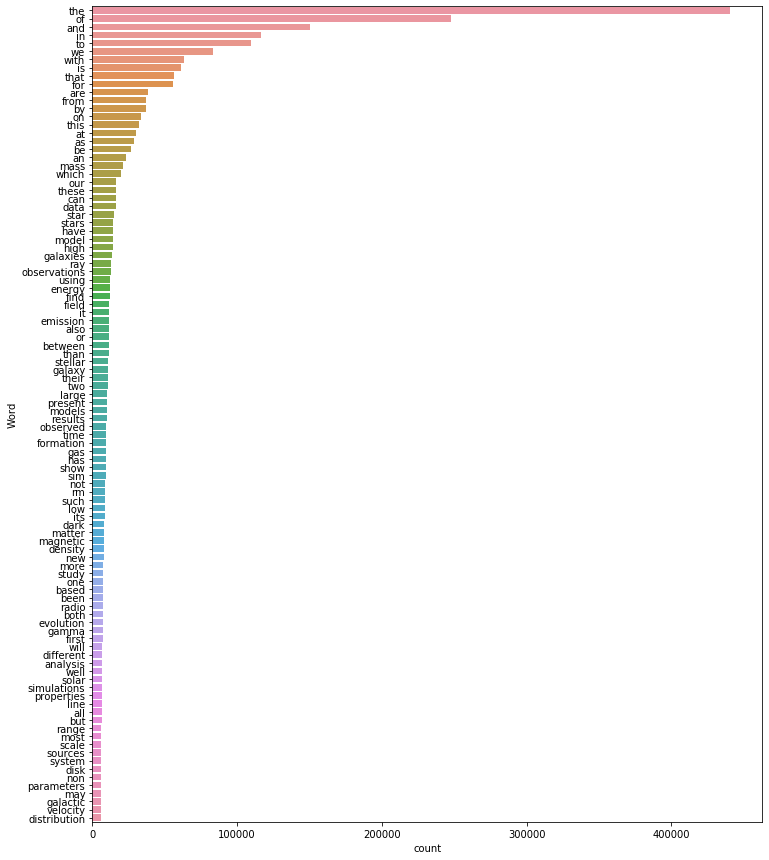

In [16]:
def freq_words(x, terms = 30): 
    
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()
  

freq_words(train['Abstract'], 100)

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

train['Abstract'] = train['Abstract'].apply(lambda x: remove_stopwords(x))

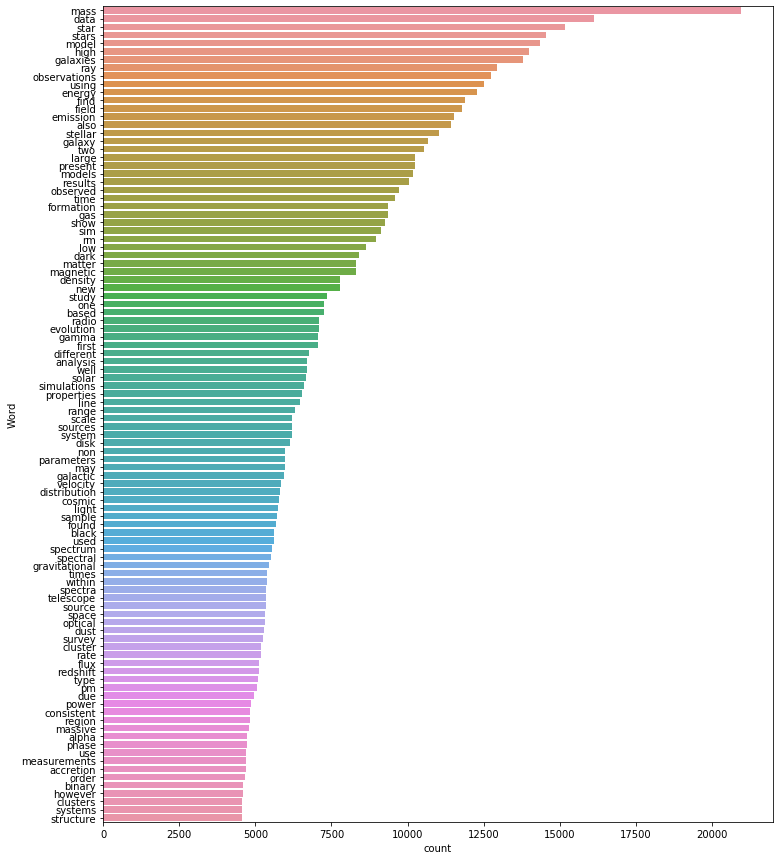

In [19]:
def freq_words(x, terms): 
    
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()
  

freq_words(train['Abstract'], 100)

In [20]:
pip install --upgrade gensim

Requirement already up-to-date: gensim in f:\anaconda\lib\site-packages (3.8.1)
Note: you may need to restart the kernel to use updated packages.


## Grouping by month

In [21]:
import datetime
temp=[]
for i in range(len(train)):
    a = train.Date[i]
    datee = datetime.datetime.strptime(a, "%Y-%m-%d")
    temp.append(datee.month)
    

In [22]:
train['Month'] = temp

In [23]:
train

,Title,Date,Abstract,Astronomy and Astrophysics,Astrophysics,Astrophysics - Astrophysics of Galaxies,Astrophysics - Cosmology and Nongalactic Astrophysics,Astrophysics - Earth and Planetary Astrophysics,Astrophysics - High Energy Astrophysical Phenomena,Astrophysics - Instrumentation and Methods for Astrophysics,...,Quantitative Biology - Populations and Evolution,Quantitative Biology - Quantitative Methods,Quantitative Finance - Statistical Finance,Quantum Physics,Statistics - Applications,Statistics - Computation,Statistics - Machine Learning,Statistics - Methodology,Statistics - Other Statistics,Month
0,the neutrino ball model of quasar,1993-04-07,suggested nonorthodox model quasar neutrino ba...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,charged boson stars and vacuum instabilities,1993-05-12,consider charged boson stars study effect stru...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,pre main sequence lithium burning weak tauri s...,1993-08-31,derive lithium abundances tauri stars tts conc...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,very high energy gamma rays from agn cascading...,1993-12-18,recent high energy gamma ray observations mev ...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
4,from the owl to the eskimo the radiation gasdy...,1994-04-29,present results two dimensional radiation gasd...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,on symmetries of hamiltonians describing syste...,2019-04-30,consider systems dynamical variables generator...,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,4
29187,can dark energy be expressed as power series o...,2019-04-30,work examine possibility dark energy de densit...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
29188,slim accretion disks theory and observational ...,2019-04-30,slim accretion disks idea emerged years ago an...,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
29189,solar mass black hole in the nucleus of bulgel...,2019-04-30,motions gas stars nuclei nearby large galaxies...,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [24]:
train.groupby(['Month']).sum()

,Astronomy and Astrophysics,Astrophysics,Astrophysics - Astrophysics of Galaxies,Astrophysics - Cosmology and Nongalactic Astrophysics,Astrophysics - Earth and Planetary Astrophysics,Astrophysics - High Energy Astrophysical Phenomena,Astrophysics - Instrumentation and Methods for Astrophysics,Astrophysics - Solar and Stellar Astrophysics,"Astrophysics of Galaxies (astro-ph.GA), Cosmology and Nongalactic\n Astrophysics (astro-ph.CO)",Computer Science - Artificial Intelligence,...,Quantitative Biology - Other Quantitative Biology,Quantitative Biology - Populations and Evolution,Quantitative Biology - Quantitative Methods,Quantitative Finance - Statistical Finance,Quantum Physics,Statistics - Applications,Statistics - Computation,Statistics - Machine Learning,Statistics - Methodology,Statistics - Other Statistics
Month,,,,,,,,,,,,,,,,,,,,,
1,0,40,907,563,397,735,327,674,0,1,...,0,1,0,0,8,2,2,6,3,0
2,0,35,787,540,329,676,325,633,0,0,...,0,0,0,0,6,3,1,4,1,0
3,0,44,969,660,504,858,426,697,0,2,...,0,1,0,0,8,5,2,5,3,0
4,1,65,929,648,389,757,313,758,0,1,...,0,0,0,0,7,6,4,3,3,1
5,0,73,522,417,222,408,209,422,0,1,...,0,0,1,1,2,2,0,1,1,0
6,0,81,491,412,191,416,234,351,1,1,...,1,1,0,0,4,1,0,1,0,0
7,0,84,533,458,206,548,382,403,0,0,...,1,1,1,0,8,9,2,5,0,0
8,0,57,465,401,205,560,287,384,0,0,...,0,0,0,0,6,0,0,0,0,0
9,0,96,541,476,228,538,319,379,0,0,...,0,0,0,0,8,2,0,3,3,0


In [25]:
train[['Abstract','Title']]

,Abstract,Title
0,suggested nonorthodox model quasar neutrino ba...,the neutrino ball model of quasar
1,consider charged boson stars study effect stru...,charged boson stars and vacuum instabilities
2,derive lithium abundances tauri stars tts conc...,pre main sequence lithium burning weak tauri s...
3,recent high energy gamma ray observations mev ...,very high energy gamma rays from agn cascading...
4,present results two dimensional radiation gasd...,from the owl to the eskimo the radiation gasdy...
...,...,...
29186,consider systems dynamical variables generator...,on symmetries of hamiltonians describing syste...
29187,work examine possibility dark energy de densit...,can dark energy be expressed as power series o...
29188,slim accretion disks idea emerged years ago an...,slim accretion disks theory and observational ...
29189,motions gas stars nuclei nearby large galaxies...,solar mass black hole in the nucleus of bulgel...


## Joining heading and abstract 

In [26]:
train['abstract_new']=train['Abstract']+train['Title']

# Stemming of Vocabulary

https://www.geeksforgeeks.org/introduction-to-stemming/

In [27]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [28]:
ps=PorterStemmer()

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
train

,Title,Date,Abstract,Astronomy and Astrophysics,Astrophysics,Astrophysics - Astrophysics of Galaxies,Astrophysics - Cosmology and Nongalactic Astrophysics,Astrophysics - Earth and Planetary Astrophysics,Astrophysics - High Energy Astrophysical Phenomena,Astrophysics - Instrumentation and Methods for Astrophysics,...,Quantitative Biology - Quantitative Methods,Quantitative Finance - Statistical Finance,Quantum Physics,Statistics - Applications,Statistics - Computation,Statistics - Machine Learning,Statistics - Methodology,Statistics - Other Statistics,Month,abstract_new
0,the neutrino ball model of quasar,1993-04-07,suggested nonorthodox model quasar neutrino ba...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,suggested nonorthodox model quasar neutrino ba...
1,charged boson stars and vacuum instabilities,1993-05-12,consider charged boson stars study effect stru...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,consider charged boson stars study effect stru...
2,pre main sequence lithium burning weak tauri s...,1993-08-31,derive lithium abundances tauri stars tts conc...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,derive lithium abundances tauri stars tts conc...
3,very high energy gamma rays from agn cascading...,1993-12-18,recent high energy gamma ray observations mev ...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12,recent high energy gamma ray observations mev ...
4,from the owl to the eskimo the radiation gasdy...,1994-04-29,present results two dimensional radiation gasd...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,present results two dimensional radiation gasd...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,on symmetries of hamiltonians describing syste...,2019-04-30,consider systems dynamical variables generator...,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,4,consider systems dynamical variables generator...
29187,can dark energy be expressed as power series o...,2019-04-30,work examine possibility dark energy de densit...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,4,work examine possibility dark energy de densit...
29188,slim accretion disks theory and observational ...,2019-04-30,slim accretion disks idea emerged years ago an...,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,4,slim accretion disks idea emerged years ago an...
29189,solar mass black hole in the nucleus of bulgel...,2019-04-30,motions gas stars nuclei nearby large galaxies...,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,4,motions gas stars nuclei nearby large galaxies...


In [31]:
x=train.iloc[:,115]

In [32]:
x

0        suggested nonorthodox model quasar neutrino ba...
1        consider charged boson stars study effect stru...
2        derive lithium abundances tauri stars tts conc...
3        recent high energy gamma ray observations mev ...
4        present results two dimensional radiation gasd...
                               ...                        
29186    consider systems dynamical variables generator...
29187    work examine possibility dark energy de densit...
29188    slim accretion disks idea emerged years ago an...
29189    motions gas stars nuclei nearby large galaxies...
29190    report discovery microlensing planet ogle blg ...
Name: abstract_new, Length: 29191, dtype: object

In [33]:
x=x.apply(lambda y:word_tokenize(y))

In [34]:
x=x.apply(lambda x: [ps.stem(y) for y in x])

In [35]:
sent=[]
for row in x:
    sequ=''
    for word in row:
        sequ=sequ +' ' + word
    sent.append(sequ)
x=sent

In [36]:
x

[' suggest nonorthodox model quasar neutrino ball describ term standard model extend ad right hand neutrino majorana scalar field present order explain quasar bodi weak interact neutrino neutrino interact scalar majorana field violat lepton number produc mass split neutrino due sea saw mechan model quasar object appear result first order cosmolog phase transit interpret quasar may regard ball fill dirac neutrino treat remnant phase transit unbroken global lepton symmetri paper studi macroscop paramet configur result mass radiu curv quasar obtainedth neutrino ball model of quasar',
 ' consid charg boson star studi effect structur vacuum compact particl like star constitu mass close planck mass pl cal alpha pl argu limit total electr charg primarili due format pion condens simeq alpha alpha fine structur constant electr charg positron charg star larger find numer evid complet screen indic limit charg compact object also less effici compet charg screen mechan due spontan electron positron

In [37]:
train['abstract_new']=x

In [38]:
train.head()

,Title,Date,Abstract,Astronomy and Astrophysics,Astrophysics,Astrophysics - Astrophysics of Galaxies,Astrophysics - Cosmology and Nongalactic Astrophysics,Astrophysics - Earth and Planetary Astrophysics,Astrophysics - High Energy Astrophysical Phenomena,Astrophysics - Instrumentation and Methods for Astrophysics,...,Quantitative Biology - Quantitative Methods,Quantitative Finance - Statistical Finance,Quantum Physics,Statistics - Applications,Statistics - Computation,Statistics - Machine Learning,Statistics - Methodology,Statistics - Other Statistics,Month,abstract_new
0,the neutrino ball model of quasar,1993-04-07,suggested nonorthodox model quasar neutrino ba...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,suggest nonorthodox model quasar neutrino bal...
1,charged boson stars and vacuum instabilities,1993-05-12,consider charged boson stars study effect stru...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,consid charg boson star studi effect structur...
2,pre main sequence lithium burning weak tauri s...,1993-08-31,derive lithium abundances tauri stars tts conc...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,deriv lithium abund tauri star tt concentr we...
3,very high energy gamma rays from agn cascading...,1993-12-18,recent high energy gamma ray observations mev ...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12,recent high energi gamma ray observ mev blaza...
4,from the owl to the eskimo the radiation gasdy...,1994-04-29,present results two dimensional radiation gasd...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,present result two dimension radiat gasdynam ...


In [39]:
train.iloc[:,115]

0         suggest nonorthodox model quasar neutrino bal...
1         consid charg boson star studi effect structur...
2         deriv lithium abund tauri star tt concentr we...
3         recent high energi gamma ray observ mev blaza...
4         present result two dimension radiat gasdynam ...
                               ...                        
29186     consid system dynam variabl gener su group su...
29187     work examin possibl dark energi de densiti rh...
29188     slim accret disk idea emerg year ago answer s...
29189     motion ga star nuclei nearbi larg galaxi demo...
29190     report discoveri microlens planet ogl blg lb ...
Name: abstract_new, Length: 29191, dtype: object

# Applying tf-idf weights

http://www.tfidf.com/

In [40]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [41]:
traintfidf=tfidf_vectorizer.fit_transform(train.iloc[:,115].values)

In [42]:
traintfidf.shape

(29191, 10000)

In [43]:
print(tfidf_vectorizer.get_feature_names())

['aa', 'aae', 'aal', 'aao', 'aaomega', 'aat', 'aatau', 'aavso', 'ab', 'abacu', 'abandon', 'abc', 'abel', 'abelian', 'aberr', 'abil', 'abiogenesi', 'abiot', 'abl', 'abla', 'ablat', 'abnorm', 'aboard', 'aborigin', 'about', 'abov', 'abridg', 'abridgedth', 'abrupt', 'abruptli', 'absenc', 'absent', 'absolut', 'absorb', 'absorpt', 'abstract', 'abu', 'abund', 'abundantli', 'abyss', 'ac', 'aca', 'academ', 'academi', 'acc', 'acceler', 'accept', 'access', 'accident', 'accommod', 'accompani', 'accomplish', 'accord', 'accordingli', 'account', 'accret', 'accretor', 'accumul', 'accur', 'accuraci', 'ace', 'acet', 'acetaldehyd', 'acetylen', 'acf', 'achiev', 'achromat', 'aci', 'acid', 'acknowledg', 'aco', 'acoust', 'acquir', 'acquisit', 'acronym', 'across', 'act', 'actea', 'actinid', 'action', 'activ', 'activityth', 'actor', 'actpol', 'actual', 'actuat', 'acut', 'ad', 'adaf', 'adapt', 'adc', 'add', 'addit', 'address', 'adequ', 'adequaci', 'adher', 'adhes', 'adi', 'adiabat', 'adjac', 'adjust', 'adm', 'a

In [44]:
print(traintfidf.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [45]:
train_new=traintfidf.todense()

In [46]:
xtrain, xval, ytrain, yval = train_test_split(train_new, train.iloc[:,3:114], test_size=0.2, random_state=9)

In [47]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

clf = OneVsRestClassifier(LinearSVC())
clf.fit(xtrain, ytrain.values)

F:\ANACONDA\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 34 is present in all training examples.
  str(classes[c]))
F:\ANACONDA\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 36 is present in all training examples.
  str(classes[c]))
F:\ANACONDA\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 46 is present in all training examples.
  str(classes[c]))
F:\ANACONDA\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 110 is present in all training examples.
  str(classes[c]))


OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [48]:
from sklearn.metrics import f1_score
y_pred=clf.predict(xval)
print(f1_score(yval,y_pred,average="micro"))

0.7583194436461865


We used a basic Support vector machine, to obtain a decent f1 score of 0.75.

# Future Work

We will use other word embedding techniques like Glove,Word2Vec etc.
We will train the data on many other algorithms like random forest etc.
